<a href="https://colab.research.google.com/github/Madhu2522/code/blob/main/DataMiningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

stroke_df = pd.read_csv('C:\\Users\\Student\\Desktop\\madhumitha\\data mining\\stroke.csv')

In [ ]:
stroke_df.describe(include='all')
#This will give us the descriptive statistics for all the columns in the dataset. 
#We can see that the 'BMI' column has 201 missing values.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

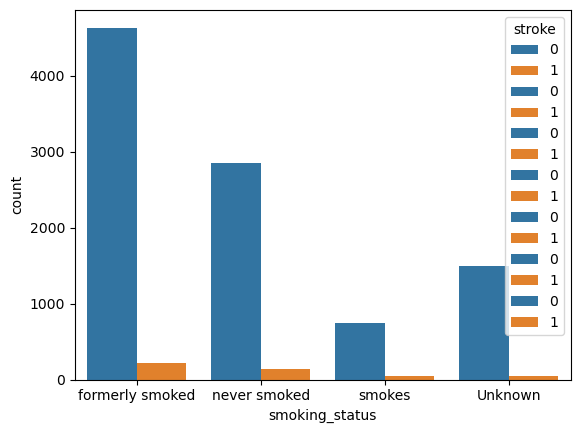

In [ ]:
# Gender
sns.countplot(x='gender', hue='stroke', data=stroke_df)

# Hypertension
sns.countplot(x='hypertension', hue='stroke', data=stroke_df)

# Heart disease
sns.countplot(x='heart_disease', hue='stroke', data=stroke_df)

# Ever married
sns.countplot(x='ever_married', hue='stroke', data=stroke_df)

# Work type
sns.countplot(x='work_type', hue='stroke', data=stroke_df)

# Residence type
sns.countplot(x='Residence_type', hue='stroke', data=stroke_df)

# Smoking status
sns.countplot(x='smoking_status', hue='stroke', data=stroke_df)


<AxesSubplot:xlabel='age', ylabel='Density'>

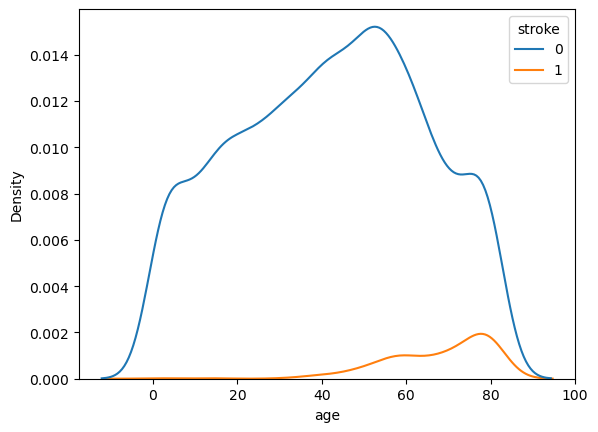

In [ ]:
sns.kdeplot(x='age', hue='stroke', data=stroke_df)
#from the plot, we understand that as age increases, the likelihood of having a stroke also increases.

<AxesSubplot:xlabel='stroke', ylabel='age'>

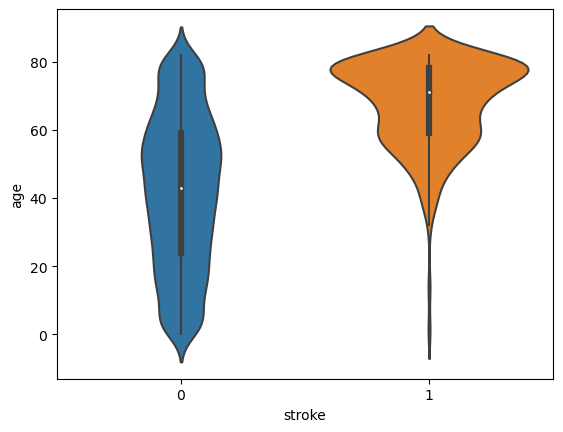

In [ ]:
sns.violinplot(x='stroke', y='age', data=stroke_df)

In [ ]:
stroke_df['stroke'].value_counts(normalize=True)
#Yes, the dataset is imbalanced because we can see that stroke column is the target class which has uneven observations,
#that is only 5% of the observations have a stroke

0    0.951272
1    0.048728
Name: stroke, dtype: float64

<AxesSubplot:>

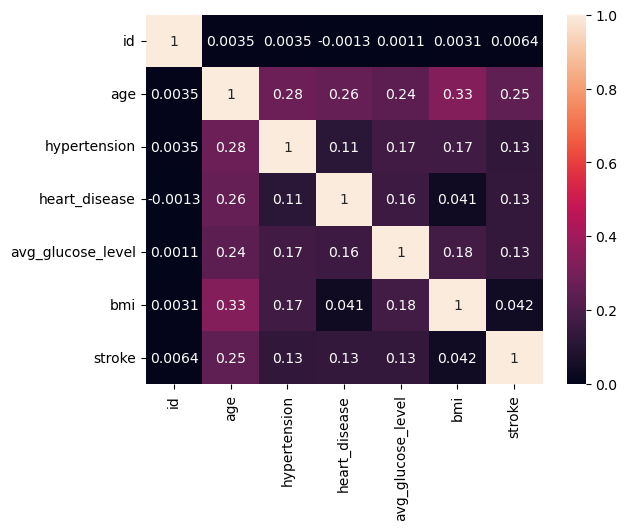

In [ ]:
sns.heatmap(stroke_df.corr(), annot=True)
#We can see that there is a moderate positive correlation between age and hypertension, as well as between age and heart disease.
# There is also a weak positive correlation between age and stroke. The strongest correlation is between hypertension and stroke.

In [ ]:
#checking for outliers in the BMI column and Average_Glucose Column and removing them
stroke_df = stroke_df[(stroke_df['bmi'] >= 10) & (stroke_df['bmi'] <= 50)]
stroke_df = stroke_df[(stroke_df['avg_glucose_level'] >= 40) & (stroke_df['avg_glucose_level'] <= 250)]

In [ ]:
# Filling missing values of bmi with mean of the column
stroke_df['bmi'].fillna(stroke_df['bmi'].mean(), inplace=True)

In [ ]:
# Encoding categorical variables using LabelEncoder
le = LabelEncoder()
stroke_df['gender'] = le.fit_transform(stroke_df['gender'])
stroke_df['ever_married'] = le.fit_transform(stroke_df['ever_married'])
stroke_df['work_type'] = le.fit_transform(stroke_df['work_type'])
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,Urban,228.69,36.6,formerly smoked,1
2,31112,1,80.0,0,1,1,2,Rural,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,2,Urban,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,3,Rural,174.12,24.0,never smoked,1
5,56669,1,81.0,0,0,1,2,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,4,Rural,103.08,18.6,Unknown,0
5106,44873,0,81.0,0,0,1,3,Urban,125.20,40.0,never smoked,0
5107,19723,0,35.0,0,0,1,3,Rural,82.99,30.6,never smoked,0
5108,37544,1,51.0,0,0,1,2,Rural,166.29,25.6,formerly smoked,0
